# COVID diagnosis - book 1

## Summary

* Problem
    * Predict whether people have covid as accurately as possible - book 2
    * What symptoms/body conditions could be a sign for COVID - book 1
* Dataset - [Coronavirus Disease 2019 (COVID-19) Clinical Data Repository](https://covidclinicaldata.org/)
* EDA - Analyze association between posivity of covid test and symptoms that the patients have - book1
* Modeling - book2
    * Neural Network
    * `VotingClassifier` with `XGB`, `RandomForest`, `LogisticRegression`, `SVM`
* Conclusion
    * Below features are relatively big signs that infer you would have COVID more likely
        * Loss of smell
        * Loss of taste
        * Muscle sore
        * Body temperature
        * Heaedach
    * Neural Network with 77 % accuracy

## Problem

COVID made big impact on our world. It infects through countries rapidly and bring severe health problem all over the world.

I analyzed what kind of people should go diagnosis for covid. Idealy everyone should go but it is not very realistic and will be big loaden on hospitals so I would like to provide health workers insights that what kind of people is infected by COVID more likely so this analysis could help the health workers to pre-screen patients and would reduce infection on site.

I got dataset of COVID test results and the patients clinic information. I would like to find symptoms or clinic information which have relatively strong assciation with COVID positivity. Also I would like to create predictive model as accurately as possible.

This predictive model could help both of health workers and patients that they could know if the patients are positive by answering questions so this reduce their time and loaden a lot.

## Dataset

Obtained from [Coronavirus Disease 2019 (COVID-19) Clinical Data Repository](https://covidclinicaldata.org/)

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [2]:
# read each csv data and combine them into DataFrame
df = pd.concat([pd.read_csv('../data/'+csv) for csv in os.listdir('../data/')[1:]])

In [3]:
df.head()

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
0,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,58,True,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,False
1,2020-04-07,"SARS-CoV-2, NAA",Oropharyngeal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,False
2,2020-04-07,SARS CoV w/CoV 2 RNA,Oropharyngeal,Negative,12,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,46,True,True,False,False,False,...,False,False,False,False,True,NaN,NaN,NaN,NaN,False
4,2020-04-07,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,-1,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,False


In [4]:
df.tail()

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
7289,2020-10-20,COVID-19 PCR External Result,Nasal,Negative,26,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
7290,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,29,False,False,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
7291,2020-10-20,"SARS-CoV-2, NAA",Nasal,Negative,33,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
7292,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,46,False,False,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
7293,2020-10-20,Rapid COVID-19 PCR Test,Nasal,Negative,53,False,NaN,False,False,True,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN


## EDA

In [5]:
# check minnsing values
print('Data shape: ', df.shape)
df.isnull().sum()

Data shape:  (93995, 46)


batch_date                           0
test_name                            0
swab_type                            0
covid19_test_results                 0
age                                  0
high_risk_exposure_occupation      169
high_risk_interactions           24827
diabetes                             0
chd                                  0
htn                                  0
cancer                               0
asthma                               0
copd                                 0
autoimmune_dis                       0
smoker                               0
temperature                      46453
pulse                            45716
sys                              47472
dia                              47472
rr                               52547
sats                             46460
rapid_flu_results                93741
rapid_strep_results              93604
ctab                             58528
labored_respiration              45248
rhonchi                  

In [6]:
# check whether its unbalanced dataset
df['covid19_test_results'].value_counts(1)

Negative    0.986031
Positive    0.013969
Name: covid19_test_results, dtype: float64

### Note

* I saw some columns have a lot of missing values compared to the entire data size
* This dataset is very unbalanced. 98% of the result was negative and only 2% was positive
    * If I create either of interpretable or prediciteve model, I need to resample for positive or reduce negative data and have those in same scale
    
---

### Assumption

I assumed below features have more correlation with COVID infection so I looked into and visualized the associations. Please find what each column describes at [data dictionary](https://docs.google.com/spreadsheets/d/1p9rtv2LjVCPb54MdGe8ZqJ1zF3McIFnzq-ZhhjWgguI/edit#gid=0)

* age
* high_risk_exposure_occupation
* high_risk_interactions
* diabetes
* chd
* htn
* cancer
* asthma
* copd
* autoimmune_dis
* smoker
* temperature
* pulse
* sys
* dia
* rr
* sats
* rapid_flu_results
* tab
* labored_respiration
* rhonchi
* wheezes
* cough
* cough_severity
* fever
* sob
* sob_severity
* diarrhea
* fatigue
* headache
* loss_of_smell
* loss_of_taste
* runny_nose
* muscle_sore
* sore_throat

---

#### `Age`

See distribution of `age`. I plotted distribution of `age` for each of `Negative` and `Positive`.

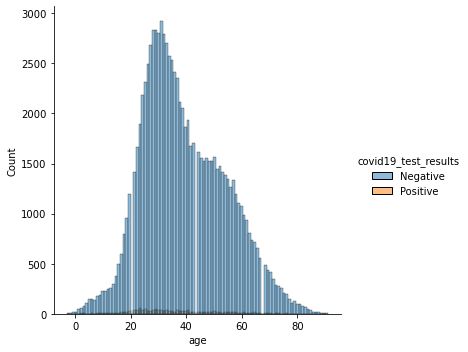

In [7]:
# distribution plot of age with Negative. This has positive result as well however it is not shown clearly due to big defference of data size
sns.displot(data=df, x='age', hue='covid19_test_results');

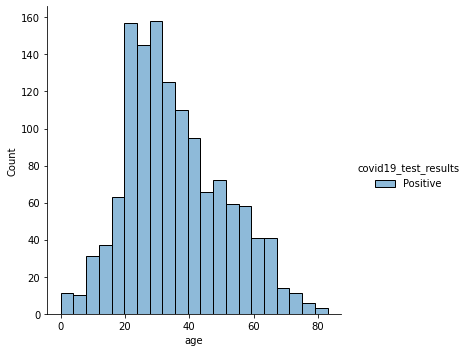

In [8]:
# distribution plot of age of Negative
sns.displot(data=df[df['covid19_test_results']=='Positive'], x='age', hue='covid19_test_results');

It looks like there is no significant difference between distributions of `age` for both of `Positive` and `Negative`

---

#### `diabetes`, `chd`, `htn`, `cancer`, `asthma`, `copd`, `autoimmune_dis`, `smoker`, `cough`

These columns do not have any missing value so I got those correlation all together. Before I got the correlation, I needed to conduct some modification of `df`. Most columns contains `True` or `False`, and the label `covid10_test_results` contains `Positive` and `Negative`. I would like to convert all of these to numeric. And also, this dataset is very unbalanced. I would like to have `Positive` and `Negative` in same scale

In [9]:
# convert the lable to numeric
df['covid19_test_results'] = df['covid19_test_results'].map({'Positive': 1, 'Negative': 0})
df[['covid19_test_results']].head(3)

,covid19_test_results
0,0
1,0
2,0


In [10]:
# convert all of True and False value to numeric. True -> 1, False -> 0
df = df.replace(True, 1).replace(False, 0)
df.head(3)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
0,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,0,58,1.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
1,2020-04-07,"SARS-CoV-2, NAA",Oropharyngeal,0,35,0.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
2,2020-04-07,SARS CoV w/CoV 2 RNA,Oropharyngeal,0,12,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
# check Positive data size
positive_data = df[df['covid19_test_results']==1]
print('data size of Positive: ', positive_data.shape[0])

data size of Positive:  1313


In [12]:
# sample Negative with same size of Positive
negative_1313 = df[df['covid19_test_results']==0].sample(positive_data.shape[0], random_state=42)
negative_1313.head(3)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
6043,2020-10-06,"SARS-CoV-2, NAA",Nasal,0,18,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2529,2020-08-04,Rapid COVID-19 PCR Test,Nasal,0,26,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
938,2020-10-20,Rapid COVID-19 PCR Test,Nasal,0,33,0.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


1313 1313


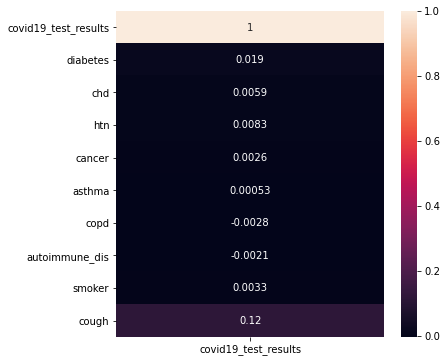

In [40]:
# see correlation of test result with diabetes, chd, htn, cancer, asthma, copd, autoimmune_dis, smoker and cough
features = ['covid19_test_results', 'diabetes', 'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker', 'cough']
temp = pd.concat([positive_data, negative_1313])
plt.figure(figsize=(6, 6))
sns.heatmap(df[features].corr()[['covid19_test_results']], annot=True);

I can see `cough` infers positivity of covid test. Other features are not significant signal

---

Now I would like to look into other feautures however, they have a lot of missing values. Let's look at `positive_data` for the missing values first

In [14]:
positive_data.isnull().sum()

batch_date                          0
test_name                           0
swab_type                           0
covid19_test_results                0
age                                 0
high_risk_exposure_occupation       5
high_risk_interactions            235
diabetes                            0
chd                                 0
htn                                 0
cancer                              0
asthma                              0
copd                                0
autoimmune_dis                      0
smoker                              0
temperature                       242
pulse                             231
sys                               249
dia                               249
rr                                345
sats                              237
rapid_flu_results                1290
rapid_strep_results              1293
ctab                              428
labored_respiration               236
rhonchi                           722
wheezes     

I would like to check each column. Let's start with `rapid_flu_results`

In [15]:
# get rows which do not mark as missing values under rapid_flu_results
rapid_flu_results_index = positive_data['rapid_flu_results'].dropna().index
positive_data.drop([row for row in positive_data.index if row not in rapid_flu_results_index])[['rapid_flu_results', 'covid19_test_results']]

,rapid_flu_results,covid19_test_results
28,Negative,1
174,Negative,1
341,Negative,1
405,Negative,1
406,Negative,1
427,Negative,1
661,Negative,1
717,NaN,1
103,Negative,1
127,Negative,1


In `positive_data`,  `rapid_flu_results` stores only `Negative` and `NaN`. I could not analyze association with positivity of covid test without `Positive`

As I see in `rapid_flu_results`, other features could be unbalanced in terms of `covid19_test_results`. Let's check it

In [16]:
# dictionary `value_counts` contains number of values for each column.
# If this numer is 1, I am not able to analyze association between covid19_test_results and the column

features = positive_data.drop(
    columns={'batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age', 
             'cxr_findings', 'cxr_impression', 'cxr_label', 'cxr_link', 'er_referral',  
             'diabetes', 'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker', 'cough'}
).columns

value_counts = {}

for column in features:
    value_counts[column] = len(positive_data[column].value_counts())
    
value_counts

{'high_risk_exposure_occupation': 2,
 'high_risk_interactions': 2,
 'temperature': 50,
 'pulse': 78,
 'sys': 79,
 'dia': 60,
 'rr': 16,
 'sats': 10,
 'rapid_flu_results': 1,
 'rapid_strep_results': 2,
 'ctab': 2,
 'labored_respiration': 2,
 'rhonchi': 2,
 'wheezes': 2,
 'days_since_symptom_onset': 13,
 'cough_severity': 3,
 'fever': 2,
 'sob': 2,
 'sob_severity': 2,
 'diarrhea': 2,
 'fatigue': 2,
 'headache': 2,
 'loss_of_smell': 2,
 'loss_of_taste': 2,
 'runny_nose': 2,
 'muscle_sore': 2,
 'sore_throat': 2}

#### I see other columns have more than 1 value. I am able to analyze expect `rapid_flu_results`

#### `high_risk_exposure_occupation`

I would like to look into correlation between `high_risk_exposure_occupation` and `covid19_test_results` next

In [17]:
high_risk_exposure_occupation_index = positive_data['high_risk_exposure_occupation'].dropna().index
high_risk_exposure_occupation = positive_data.drop([row for row in positive_data.index if row not in high_risk_exposure_occupation_index])
high_risk_exposure_occupation.head(3)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
21,2020-04-07,SARS COV 2 RNA RTPCR,Oropharyngeal,1,33,0.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0
24,2020-04-07,SARS CoV w/CoV 2 RNA,Nasopharyngeal,1,56,0.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,The cardiac silhouette is normal.\nThere is no...,No radiographic evidence of acute abnormality.,Negative,https://braid.health/viewer/study/6298947bafeb...,0.0
28,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,1,50,0.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0


In [18]:
temp_negative = df[df['covid19_test_results']==0].sample(len(high_risk_exposure_occupation_index), random_state=42)
temp_negative.head(3)

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
6043,2020-10-06,"SARS-CoV-2, NAA",Nasal,0,18,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2529,2020-08-04,Rapid COVID-19 PCR Test,Nasal,0,26,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
938,2020-10-20,Rapid COVID-19 PCR Test,Nasal,0,33,0.0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
temp_features = ['covid19_test_results', 'high_risk_exposure_occupation']
temp_df = pd.concat([high_risk_exposure_occupation, temp_negative[temp_features]])
print('Corralation between covid19_test_results and high_risk_exposure_occupation: ', df.corr()['covid19_test_results'].loc['high_risk_exposure_occupation'])

Corralation between covid19_test_results and high_risk_exposure_occupation:  0.04111860071644026


`high_risk_exposure_pccupation` has relatively higher correlation with positivity of COVID test

---

I created a function to apply same method as `high_risk_exposure_occupation` on the other columns to get the correlations

In [25]:
# get a column and return correlation between the column and covid19_test_results

def get_corr(column):
    
    # DataFrame stored with validate positive rows
    positive_validate_rows = positive_data[positive_data[column].notna()]
    
    # DataFrame stored with validate negative rows
    negative_validate_rows = df[(df['covid19_test_results']==0) & (df[column].notna())]
    
    # data size check
    if len(negative_validate_rows) >= len(positive_validate_rows):
        sampled_negative = negative_validate_rows.sample(len(positive_validate_rows), random_state=42)
    else:
        sampled_negative = negative_validate_rows
        
    # DataFrame to get correlation
    temp_df = pd.concat([positive_validate_rows, sampled_negative])
    
    print(f'Corralation between covid19_test_results and {column}: ', temp_df.corr()['covid19_test_results'].loc[column])
    print(f'positive data size: {len(positive_validate_rows)}, negative data size: {len(sampled_negative)}')

See which is not numerical column. I needed to convert `object` columns to numerical to use above function

In [21]:
features = positive_data.drop(
    columns={'batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age', 
             'cxr_findings', 'cxr_impression', 'cxr_label', 'cxr_link', 'er_referral', 'rapid_flu_results', 
             'diabetes', 'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker', 'cough'}
).columns

positive_data[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 21 to 6773
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   high_risk_exposure_occupation  1308 non-null   float64
 1   high_risk_interactions         1078 non-null   float64
 2   temperature                    1071 non-null   float64
 3   pulse                          1082 non-null   float64
 4   sys                            1064 non-null   float64
 5   dia                            1064 non-null   float64
 6   rr                             968 non-null    float64
 7   sats                           1076 non-null   float64
 8   rapid_strep_results            20 non-null     object 
 9   ctab                           885 non-null    float64
 10  labored_respiration            1077 non-null   float64
 11  rhonchi                        591 non-null    float64
 12  wheezes                        690 non-null    

#### `rapid_strep_results`, `cough_severity`, `sob_severity` are object columns

Only 3 columns were not numerical. I would liketo see the correlation except the 3 columns first.

In [26]:
for column in features:
    if column not in ['rapid_strep_results', 'cough_severity', 'sob_severity']:
        get_corr(column)

Corralation between covid19_test_results and high_risk_exposure_occupation:  0.12967227780279883
positive data: 1308, negative data: 1308
Corralation between covid19_test_results and high_risk_interactions:  -0.015024785780670607
positive data: 1078, negative data: 1078
Corralation between covid19_test_results and temperature:  0.21003144550337854
positive data: 1071, negative data: 1071
Corralation between covid19_test_results and pulse:  0.19536109041948238
positive data: 1082, negative data: 1082
Corralation between covid19_test_results and sys:  0.04245707628934195
positive data: 1064, negative data: 1064
Corralation between covid19_test_results and dia:  0.07431686732385669
positive data: 1064, negative data: 1064
Corralation between covid19_test_results and rr:  0.08584927998418866
positive data: 968, negative data: 968
Corralation between covid19_test_results and sats:  -0.03841461443134412
positive data: 1076, negative data: 1076
Corralation between covid19_test_results and cta

#### I can see `fever`, `muscle_sore`, `temperature`, `loss_of_smell` and `loss_of_taste` are ralatively highly associated with `covid19_test_results`

I checked values of the object columns

In [23]:
positive_data['rapid_strep_results'].value_counts()

Negative    19
Other        1
Name: rapid_strep_results, dtype: int64

In [24]:
positive_data['cough_severity'].value_counts()

Mild        251
Moderate    117
Severe        8
Name: cough_severity, dtype: int64

In [25]:
positive_data['sob_severity'].value_counts()

Mild        56
Moderate    36
Name: sob_severity, dtype: int64

#### `rapid_strep_results` do not have positive result so I skipped this column

Check correlation of `cough_severity` by obtaining dummfied columns of `cough_severity`

In [37]:
cough_severity_validate_positive = positive_data[positive_data['cough_severity'].notna()]
coughseverity_negative = df[df['covid19_test_results']==0].sample(len(cough_severity_validate_positive), random_state=42)
temp_df = pd.concat([cough_severity_validate_positive, coughseverity_negative])
temp_df = pd.get_dummies(data=temp_df, columns={'cough_severity'})
# print(f'Corralation between covid19_test_results and : cough_severity', temp_df.corr()['cough_severity'])
print(temp_df.corr()['covid19_test_results'][-3:])
print(f'Data size: {len(temp_df)}')

cough_severity_Mild        0.686905
cough_severity_Moderate    0.399066
cough_severity_Severe      0.103695
Name: covid19_test_results, dtype: float64
Data size: 752


Severe cough does not seem to mean a patient has COVID more likely. Now let's check `sob_severity`

In [39]:
cough_severity_validate_positive = positive_data[positive_data['sob_severity'].notna()]
coughseverity_negative = df[df['covid19_test_results']==0].sample(len(cough_severity_validate_positive), random_state=42)
temp_df = pd.concat([cough_severity_validate_positive, coughseverity_negative])
temp_df = pd.get_dummies(data=temp_df, columns={'sob_severity'})
# print(f'Corralation between covid19_test_results and : cough_severity', temp_df.corr()['cough_severity'])
print(temp_df.corr()['covid19_test_results'][-2:])
print(f'Data size: {len(temp_df)}')

sob_severity_Mild        0.646433
sob_severity_Moderate    0.493197
Name: covid19_test_results, dtype: float64
Data size: 184


## Conclusion & Recommendation

Relatively `loss_of_smell,`, `loss_of_taste`, `muscle_sore`, `temperature`, `headach` have strong associaion with `covid_test_results`. Health workers can pre-screen patients by giving questionaire and they would group based on the result so that they could reduce infection on site

They can assume if a patients report below symptoms, the patient could be infected by COVID more likely

A patient
* cannot smell
* cannot taste
* has sore muscle
* has high temperature
* has headache